In [16]:
#from __future__ import division
#%matplotlib inline
import numpy as np, scipy as sp, seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive

The basic idea for ideal mixtures:

We want to look at the overall free energy of a substance. Say it can be a mixture of two other substances, A and B. First, say they don't mix at all. Then, there will be some free energy difference between the two, and your overall free energy is just a function of how much of each you have. WLOG, assume B has a higher gibbs free energy.

Then the "mixture" where nothing mixes looks like

In [20]:
def unmixed(x,GA0=1.0,GB0=2.0):
    return (1-x)*GA0 + x*GB0

R = 8.31

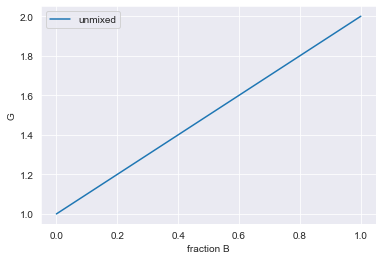

In [25]:
plt.plot(x,unmixed(x),label='unmixed')
plt.xlabel("fraction B")
plt.ylabel("G")
plt.legend();

Now, say they actually can mix. Then the entropy of mixing was something we calculated in problem 2.38, and looks like

In [26]:
def deltaS_mixing(x):
    return -R*(x*np.log(x) + (1-x)*np.log(1-x))


/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


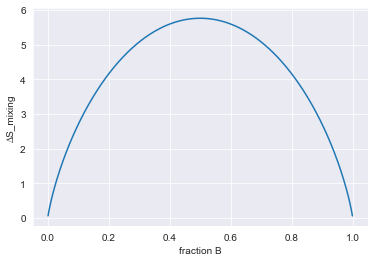

In [29]:
plt.plot(x,deltaS_mixing(x))
plt.xlabel("fraction B")
plt.ylabel("∆S_mixing");


And so, if we allow them to mix, our free energy ought to look like

In [30]:
def idealmixed(x,T,GA0=1.0,GB0=2.0):
    return unmixed(x,GA0,GB0) - T*deltaS_mixing(x)

In [31]:
def showideal(T):
    plt.clf()
    x = np.linspace(0,1,1000)
    legloc = 'lower right'
    plt.plot(x,unmixed(x),label="unmixed")
    plt.title("Ideal Mixture")
    plt.xlabel("fraction B")
    plt.ylabel("G")
    plt.plot(x,idealmixed(x,T),label="T=%3.1f"%T)
    plt.legend(loc=legloc)
    plt.show()

/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


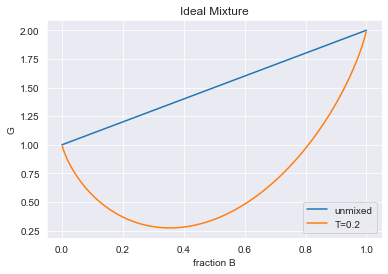

In [32]:
showideal(T=0.2)

And if we play with T

In [33]:
interact(showideal,T=(0,1,0.01));

interactive(children=(FloatSlider(value=0.0, description='T', max=1.0, step=0.01), Output()), _dom_classes=('w…

Let's choose some values to look like Fig 5.30

## Nonideal mixtures

And the key insignt into non-ideal mixtures is that maybe there's some ∆U of mixing, some interaction energy.

In [34]:
def deltaU_mixing(x):
    umax = 2.0
    return (.25 - (x-0.5)**2)*umax/.25

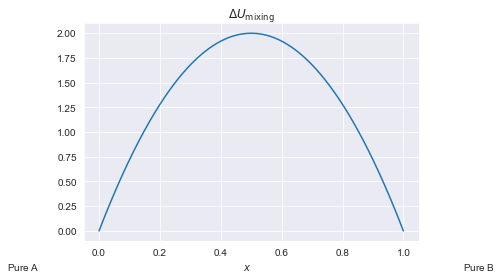

In [35]:
plt.plot(np.linspace(0,1,1000),deltaU_mixing(np.linspace(0,1,1000)))
plt.title("$\Delta U_{\mathrm{mixing}}$")
plt.xlabel("Pure A\t\t\t\t\t\t\t\t\t\t$x$\t\t\t\t\t\t\t\t\t\tPure B")
plt.show()

In [36]:
def nonidealmixed(x,T):
    return idealmixed(x,T) + deltaU_mixing(x)

def comparemixing(T=0.0):
    plt.clf()
    x = np.linspace(0,1,1000)
    legloc = 'lower right'
    plt.subplot(121)
    plt.plot(x,unmixed(x),label="unmixed")
    plt.title("Ideal Mixture")
    plt.xlabel("fraction B")
    plt.ylabel("G")
    plt.plot(x,idealmixed(x,T),label="T=%3.1f"%T)
    plt.legend(loc=legloc)

    plt.subplot(122)
    plt.plot(x,unmixed(x),label="unmixed")
    plt.title("Non-ideal Mixture")
    plt.xlabel("fraction B")
    plt.ylabel("G")
    plt.plot(x,nonidealmixed(x,T),label="T=%3.1f"%T)
    plt.legend(loc=legloc)
    plt.show()


/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


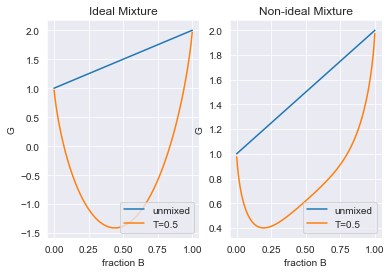

In [37]:
comparemixing(T=0.5)

In [10]:
interact(comparemixing,T=(0,1,0.01))

interactive(children=(FloatSlider(value=0.0, description='T', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.comparemixing(T=0.0)>

And if you have T = 0.3 or something, what you actually get is co-existing phases! Cool! Because what you're seeing is a concave-down free energy graph. If you have that, you have co-existing phases. Because you could just connect the tangent line to get the free-energy of an UNMIXED version.

## Now, phase changes of miscible mixtures

Not going to go into details in this notebook, but the chapter goes on nicely here to look at what happens for phase changes of miscible mixtures. It's mostly just the above procses, extended.

/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


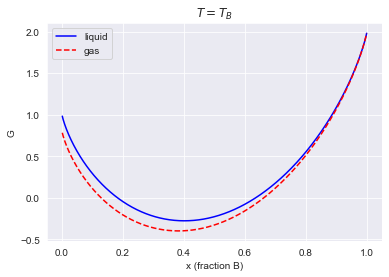

In [11]:
T = 0.3
x = np.linspace(0,1,1000)
plt.plot(x,idealmixed(x,T,GA0=1.0,GB0=2.0),'b-', label='liquid')
plt.plot(x,idealmixed(x,T,GA0=0.8,GB0=2.0),'r--', label='gas')
plt.legend()
plt.xlabel('x (fraction B)')
plt.ylabel('G')
plt.title('$T=T_B$')
plt.show()

/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


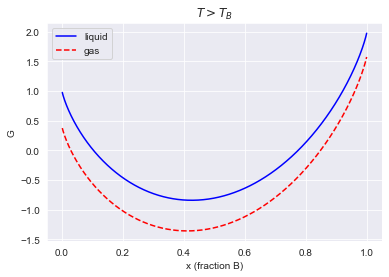

In [12]:
T = 0.4
x = np.linspace(0,1,1000)
plt.plot(x,idealmixed(x,T,GA0=1.0,GB0=2.0),'b-', label='liquid')
plt.plot(x,idealmixed(x,T,GA0=0.4,GB0=1.6),'r--', label='gas')
plt.legend()
plt.xlabel('x (fraction B)')
plt.ylabel('G')
plt.title('$T>T_B$')
plt.show()

/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


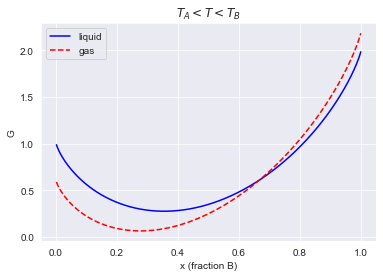

In [13]:
T = 0.2
x = np.linspace(0,1,1000)
plt.plot(x,idealmixed(x,T,GA0=1.0,GB0=2.0),'b-', label='liquid')
plt.plot(x,idealmixed(x,T,GA0=0.6,GB0=2.2),'r--', label='gas')
plt.legend()
plt.xlabel('x (fraction B)')
plt.ylabel('G')
plt.title('$T_A<T<T_B$')
plt.show()

In [14]:
def plotmixture(T=0.2,GA0liquid=1.0,GB0liquid=2.0,GA0gas=0.6,GB0gas=2.2):
    x = np.linspace(0,1,1000)
    plt.plot(x,idealmixed(x,T,GA0liquid,GB0liquid),'b-', label='liquid')
    plt.plot(x,idealmixed(x,T,GA0gas,GB0gas),'r--', label='gas')
    plt.legend()
    plt.xlabel('x (fraction B)')
    plt.ylabel('G')
    plt.show()

In [15]:
interact(plotmixture,T=(0,1,0.1),GA0liquid=(0,2,0.1),GB0liquid=(0,2,0.1),
         GA0gas=(0,2,0.1),GB0gas=(0,2,0.1))

interactive(children=(FloatSlider(value=0.2, description='T', max=1.0), FloatSlider(value=1.0, description='GA…

<function __main__.plotmixture(T=0.2, GA0liquid=1.0, GB0liquid=2.0, GA0gas=0.6, GB0gas=2.2)>